# Flight Price Prediction
## Problem Statement:
 Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [425]:
data = pd.read_excel(r"E:\Datatrained projects\Datatrained-projects\flight price prediction\Data_Train.xlsx")
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [426]:
data.shape

(10683, 11)

In [427]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### all columns except Price are object type as we can see and price is integer type which is also our target column

## FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

### Data cleaning

In [428]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### droping features like date of journey,Route,Dep_time and Arrival_time and additional information

In [429]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [430]:
data.drop(columns=['Date_of_Journey','Route','Dep_Time', 'Arrival_Time','Additional_Info'],axis=1,inplace=True)

In [431]:
data.head()

Airline    Source Destination Duration Total_Stops  Price
0       IndiGo  Banglore   New Delhi   2h 50m    non-stop   3897
1    Air India   Kolkata    Banglore   7h 25m     2 stops   7662
2  Jet Airways     Delhi      Cochin      19h     2 stops  13882
3       IndiGo   Kolkata    Banglore   5h 25m      1 stop   6218
4       IndiGo  Banglore   New Delhi   4h 45m      1 stop  13302

In [432]:
data.dropna(inplace=True) #1 row deleted

In [433]:
data.shape

(10682, 6)

In [434]:
data.isnull().sum()

Airline        0
Source         0
Destination    0
Duration       0
Total_Stops    0
Price          0
dtype: int64

In [435]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [436]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

#### now changing 
1) Airline by label encoder

2) Source and destination by similar label encoder 

3) Duration to min and then changing to integer column

4) Total_stops can be changed by ordinal encoder

In [437]:
destination = []
for i in data["Destination"]:
    if i == 'New Delhi':
        destination.append("Delhi")
    else:
        destination.append(i)

In [438]:
data['Destination']=destination

In [439]:
data.head()

Airline    Source Destination Duration Total_Stops  Price
0       IndiGo  Banglore       Delhi   2h 50m    non-stop   3897
1    Air India   Kolkata    Banglore   7h 25m     2 stops   7662
2  Jet Airways     Delhi      Cochin      19h     2 stops  13882
3       IndiGo   Kolkata    Banglore   5h 25m      1 stop   6218
4       IndiGo  Banglore       Delhi   4h 45m      1 stop  13302

In [440]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [441]:
data['Airline'] = lab_enc.fit_transform(data['Airline'])
data['Source'] = lab_enc.fit_transform(data['Source'])
data['Destination'] = lab_enc.fit_transform(data['Destination'])

In [442]:
data.head()

Airline  Source  Destination Duration Total_Stops  Price
0        3       0            2   2h 50m    non-stop   3897
1        1       3            0   7h 25m     2 stops   7662
2        4       2            1      19h     2 stops  13882
3        3       3            0   5h 25m      1 stop   6218
4        3       0            2   4h 45m      1 stop  13302

In [443]:
lab_enc.inverse_transform(data['Destination'])

array(['Delhi', 'Banglore', 'Cochin', ..., 'Delhi', 'Delhi', 'Cochin'],
      dtype=object)

In [444]:
data.head()

Airline  Source  Destination Duration Total_Stops  Price
0        3       0            2   2h 50m    non-stop   3897
1        1       3            0   7h 25m     2 stops   7662
2        4       2            1      19h     2 stops  13882
3        3       3            0   5h 25m      1 stop   6218
4        3       0            2   4h 45m      1 stop  13302

In [445]:
data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

### duration column should be changed to only one variable we are changing it to seconds

In [446]:
data['Duration']=  data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [447]:
data

Airline  Source  Destination  Duration Total_Stops  Price
0            3       0            2       170    non-stop   3897
1            1       3            0       445     2 stops   7662
2            4       2            1      1140     2 stops  13882
3            3       3            0       325      1 stop   6218
4            3       0            2       285      1 stop  13302
...        ...     ...          ...       ...         ...    ...
10678        0       3            0       150    non-stop   4107
10679        1       3            0       155    non-stop   4145
10680        4       0            2       180    non-stop   7229
10681       10       0            2       160    non-stop  12648
10682        1       2            1       500     2 stops  11753

[10682 rows x 6 columns]

In [448]:
data['Total_Stops'] = lab_enc.fit_transform(data['Total_Stops'])

In [449]:
data

Airline  Source  Destination  Duration  Total_Stops  Price
0            3       0            2       170            4   3897
1            1       3            0       445            1   7662
2            4       2            1      1140            1  13882
3            3       3            0       325            0   6218
4            3       0            2       285            0  13302
...        ...     ...          ...       ...          ...    ...
10678        0       3            0       150            4   4107
10679        1       3            0       155            4   4145
10680        4       0            2       180            4   7229
10681       10       0            2       160            4  12648
10682        1       2            1       500            1  11753

[10682 rows x 6 columns]

In [450]:
data['Total_Stops'].unique()

array([4, 1, 0, 2, 3])

## EDA

### Univariate analysis

In [451]:
import warnings 
warnings.filterwarnings('ignore')

In [452]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price'], dtype='object')

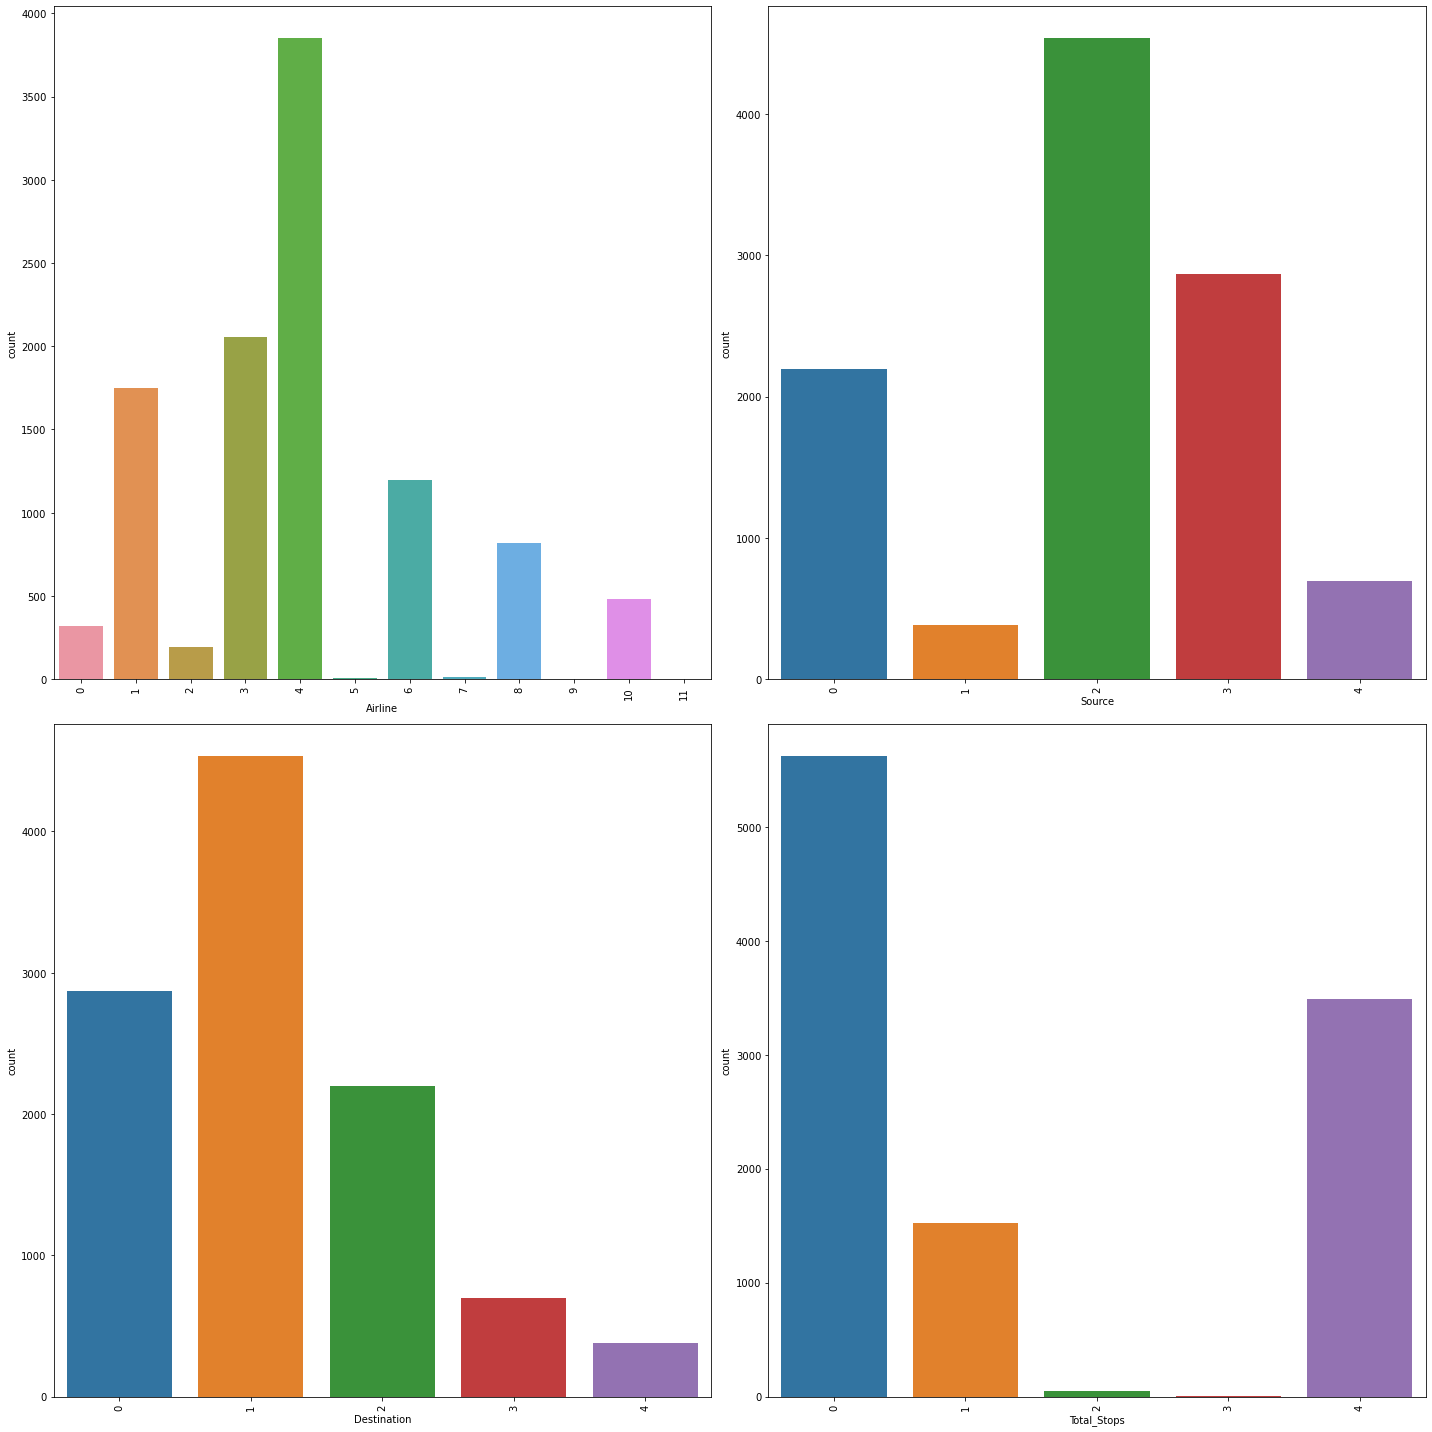

In [453]:
count_col=['Airline', 'Source', 'Destination','Total_Stops']
plt.figure(figsize=(20,20))
for i in range(len(count_col)):
  plt.subplot(2,2,i+1)
  sns.countplot(data[count_col[i]])
  plt.xticks(rotation=90)
  plt.tight_layout()

### Data distribution

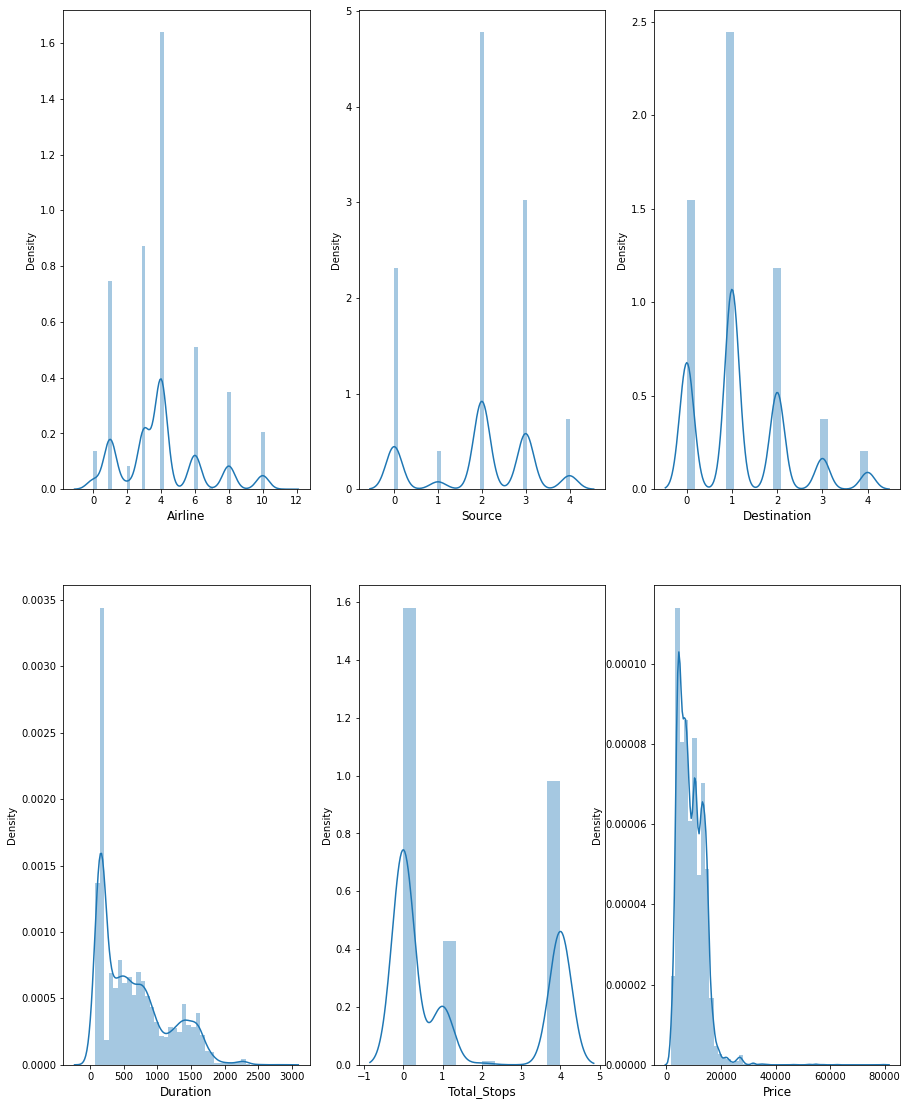

In [454]:
plt.figure(figsize=(15,30))
plotnumber=1

for column in data:
    if plotnumber<=6: #as there are 64 columns in data
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=12)
    plotnumber +=1
plt.show()

##### there is skewness but we first not apply transformer to see without the transformer then by applying transformer

In [455]:
abs(data.corr()['Price']).sort_values(ascending=True)

Source         0.015999
Airline        0.039565
Destination    0.262164
Duration       0.506480
Total_Stops    0.571221
Price          1.000000
Name: Price, dtype: float64

#### Corelation
- medium corelated with Duration and Total_stops
- good with Destination
- and week with Source and Airline

<AxesSubplot:title={'center':'Correlation with Price'}>

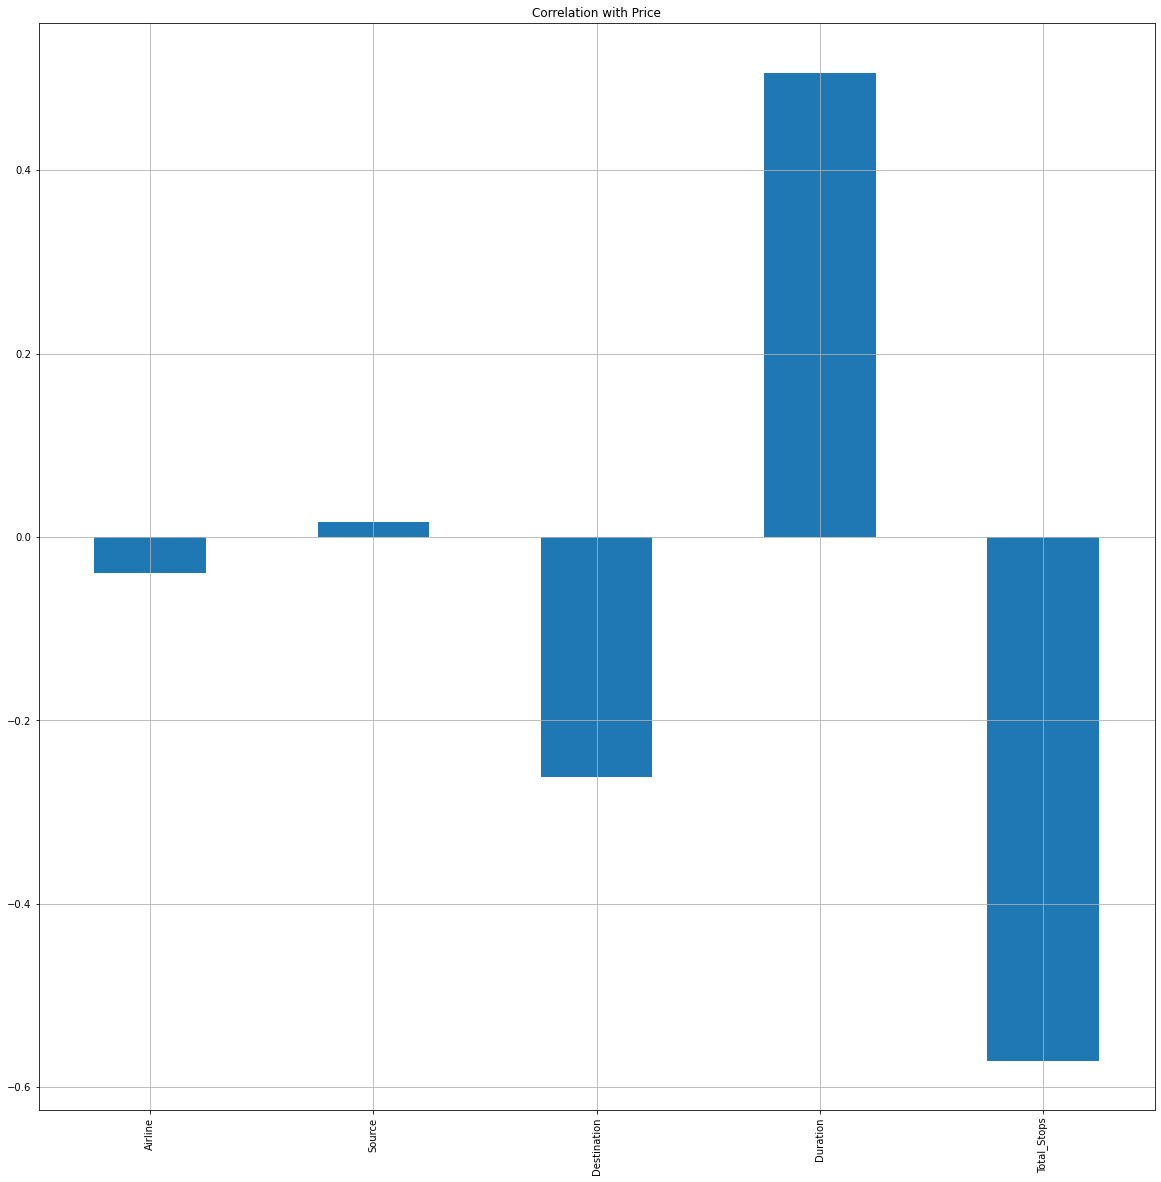

In [456]:
# visualize the correlation
data.drop('Price', axis =1).corrwith(data['Price']).plot(kind ='bar',grid = True, figsize = (20,20),
                                                   title = 'Correlation with Price')

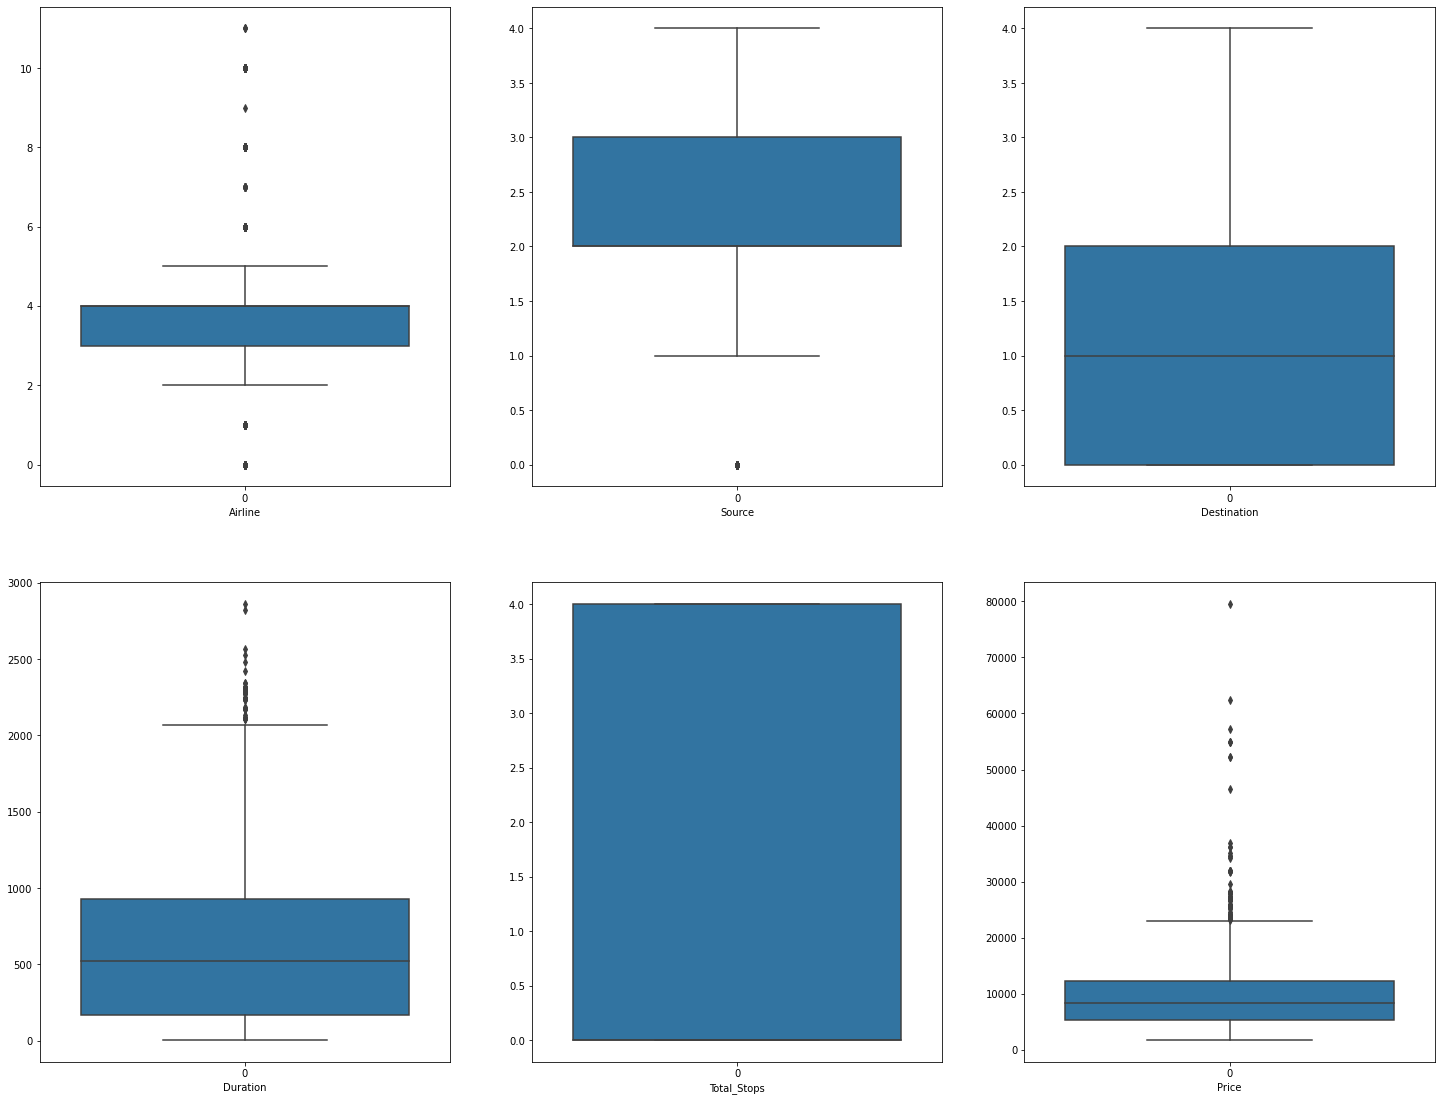

In [457]:
### checking for outliers
plt.figure(figsize=(25,30))
graph=1

for column in data:
    if graph<=6:
        ax=plt.subplot(3,3,graph)
        sns.boxplot(data = data[column],orient="v")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

#### we will not apply first for outliers after seeing first results we will apply technique to remove outliers

<function matplotlib.pyplot.show(close=None, block=None)>

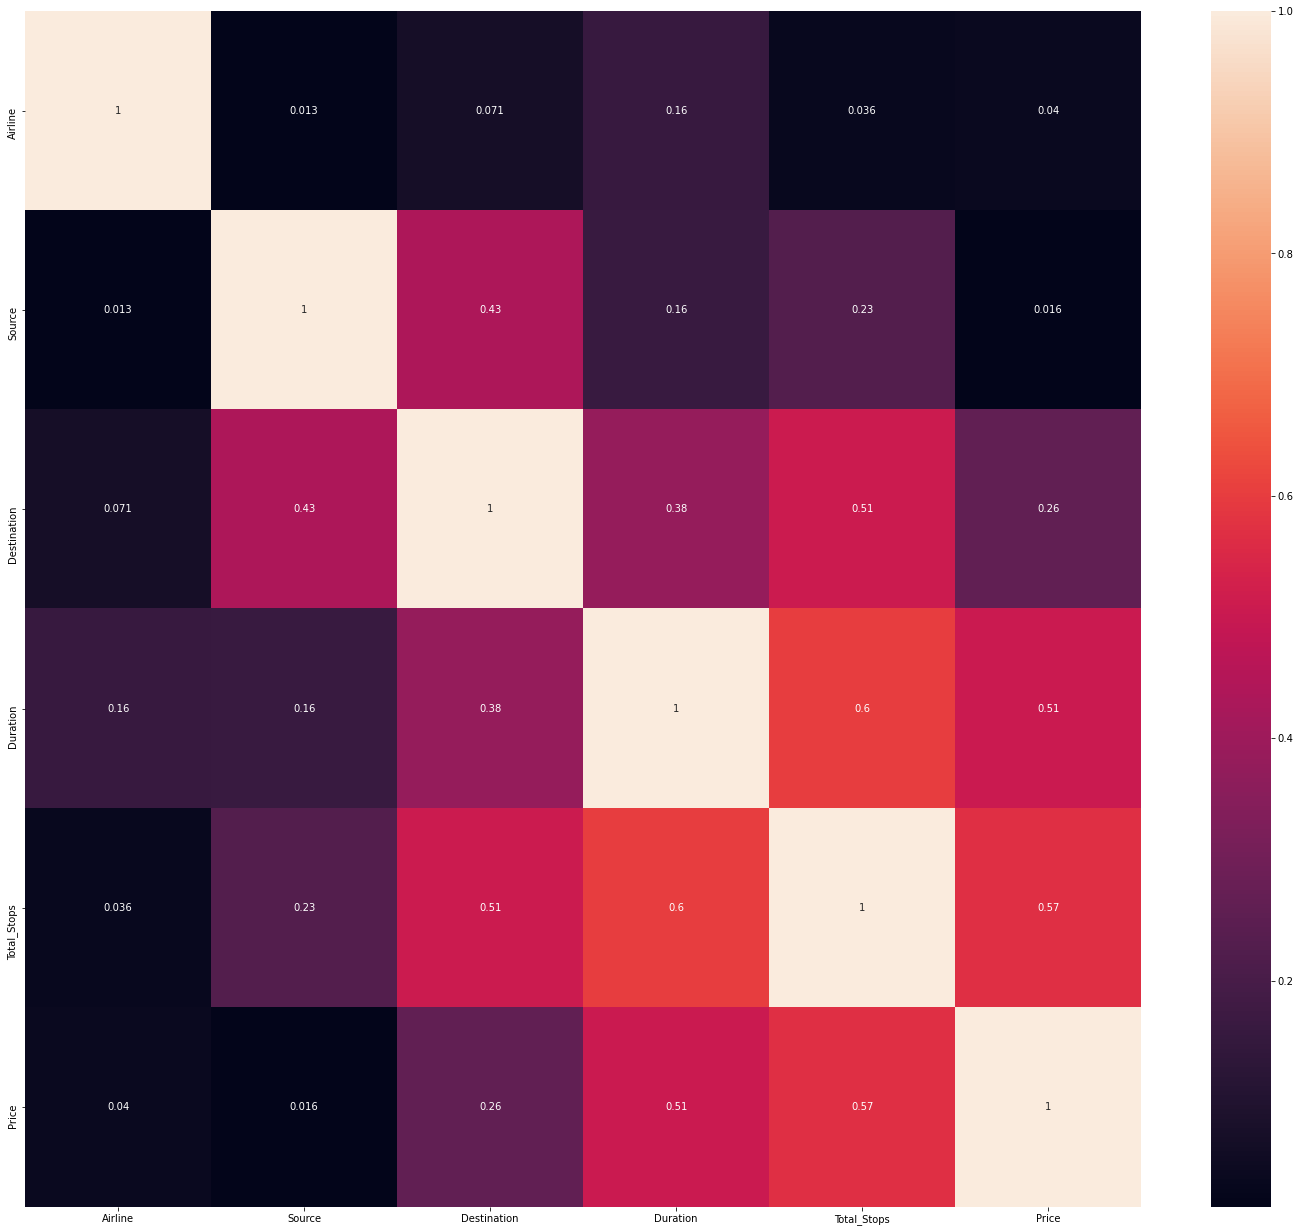

In [458]:
### heatmap
### plotting heatmap
plt.figure(figsize=(25,22))
sns.heatmap(abs(data.corr()),annot=True)
plt.show

### we will check multicolinearity by vif to cross check 

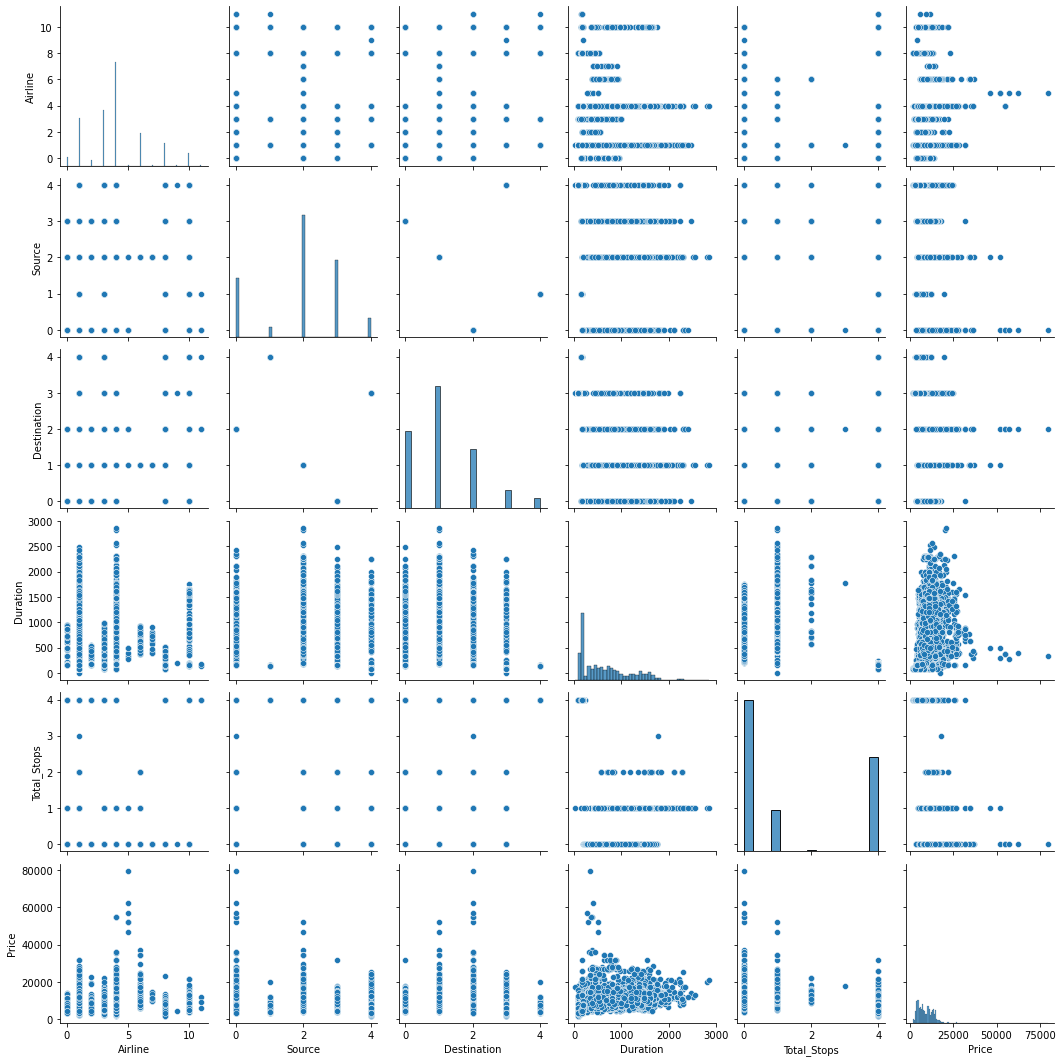

In [459]:
sns.pairplot(data)

In [460]:
data.shape

(10682, 6)

### Removing outliers

##### Inter quantile range

In [461]:
#quantile 1
q1=data.quantile(0.25)
#QUANTILE 3
q3=data.quantile(0.75)

IQR=q3-q1
IQR

Airline           1.0
Source            1.0
Destination       2.0
Duration        760.0
Total_Stops       4.0
Price          7096.0
dtype: float64

#### Outfiers detection formula
higherside==> Q3+(1.5*IQR)

lowerside==>Q3 -(1.5*IQR)

In [462]:
time_high=(q3.Duration+1.5*IQR.Duration)
print(time_high)
index = np.where(data['Duration']>time_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

2070.0
(10609, 6)


index  Airline  Source  Destination  Duration  Total_Stops  Price
0          0        3       0            2       170            4   3897
1          1        1       3            0       445            1   7662
2          2        4       2            1      1140            1  13882
3          3        3       3            0       325            0   6218
4          4        3       0            2       285            0  13302
...      ...      ...     ...          ...       ...          ...    ...
10604  10678        0       3            0       150            4   4107
10605  10679        1       3            0       155            4   4145
10606  10680        4       0            2       180            4   7229
10607  10681       10       0            2       160            4  12648
10608  10682        1       2            1       500            1  11753

[10609 rows x 7 columns]

In [463]:
pr_high=(q3.Price+1.5*IQR.Price)
print(pr_high)
index = np.where(data['Price']>pr_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

23017.0
(10516, 6)


index  Airline  Source  Destination  Duration  Total_Stops  Price
0          0        3       0            2       170            4   3897
1          1        1       3            0       445            1   7662
2          2        4       2            1      1140            1  13882
3          3        3       3            0       325            0   6218
4          4        3       0            2       285            0  13302
...      ...      ...     ...          ...       ...          ...    ...
10511  10678        0       3            0       150            4   4107
10512  10679        1       3            0       155            4   4145
10513  10680        4       0            2       180            4   7229
10514  10681       10       0            2       160            4  12648
10515  10682        1       2            1       500            1  11753

[10516 rows x 7 columns]

### Data Normalization 

features = ['Duration','Price']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
data[features]  = pt.fit_transform(data[features].values)
data.head()

### Data scaling

In [464]:
X = data.drop(columns = ['Price'],axis=1)
y = data['Price']

In [465]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns) 

In [466]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns

# lets check the vif
vif

vif     Features
0  3.114678      Airline
1  3.170610       Source
2  3.022417  Destination
3  2.662723     Duration
4  2.674729  Total_Stops

##### If vif<5 so no multicolinearity

### Model Training

##### random_State selection

In [467]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import scikitplot as skplt

In [468]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train) 
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"model perform very well")
        print("At random state",i)
        print('Training accuracy score is',r2_score(y_train,pred_train)*100)
        print('Testing accuracy score is',r2_score(y_test,pred_test)*100)

At random state 6 model perform very well
At random state 6
Training accuracy score is 45.361426520370415
Testing accuracy score is 45.39817294213236
At random state 22 model perform very well
At random state 22
Training accuracy score is 45.3619547560355
Testing accuracy score is 45.35424772102784
At random state 35 model perform very well
At random state 35
Training accuracy score is 45.3575346280108
Testing accuracy score is 45.37554958818073
At random state 96 model perform very well
At random state 96
Training accuracy score is 45.35327330247598
Testing accuracy score is 45.419530670209696
At random state 157 model perform very well
At random state 157
Training accuracy score is 45.3530876286109
Testing accuracy score is 45.389485599035005
At random state 187 model perform very well
At random state 187
Training accuracy score is 45.36576727063508
Testing accuracy score is 45.38552964663582
At random state 247 model perform very well
At random state 247
Training accuracy score is 4

#### Random_state = 736

In [469]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=736)

45.93936099327719
mean_absolute_error 2340.5664241403597
RMSE : 2962.580886523467


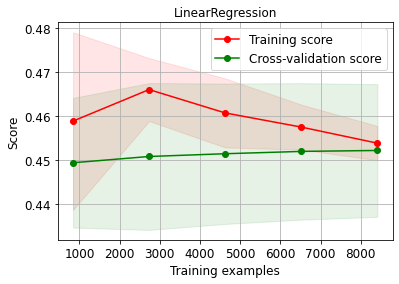

None


In [470]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(r2_score(y_test,pred)*100)
print("mean_absolute_error",mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(lr,X,y,cv=5,scoring='r2',text_fontsize='large',title='LinearRegression')
print(plt.show())

45.93903012764511
2340.8272878945586
RMSE : 2962.589952405002


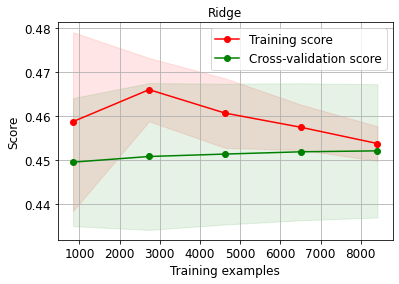

None


In [471]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
ridge = Ridge()
ridge.fit(x_train,y_train)
pred = ridge.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(ridge,X,y,cv=5,scoring='r2',text_fontsize='large',title='Ridge')
print(plt.show())

68.05382210985564
1568.5448279223247
RMSE : 2277.3987713856745


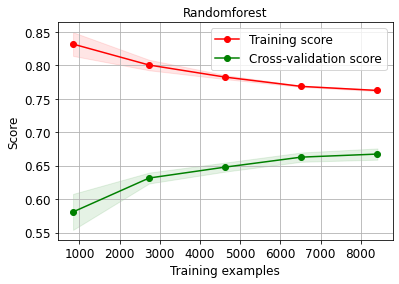

None


In [472]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(rf,X,y,cv=5,scoring='r2',text_fontsize='large',title='Randomforest')
print(plt.show())

65.9173323863798
1711.0061214950256
RMSE : 2352.3200959138294


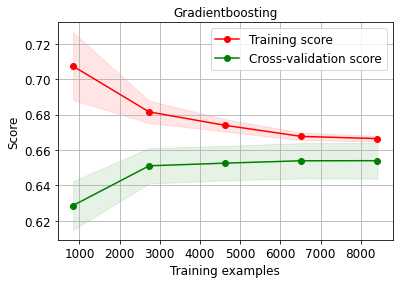

None


In [473]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(gb,X,y,cv=5,scoring='r2',text_fontsize='large',title='Gradientboosting')
print(plt.show())

65.9173323863798
1711.0061214950254
RMSE : 2352.320095913829


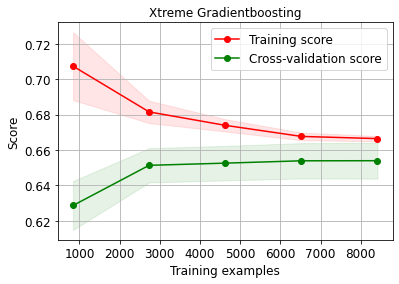

None


In [474]:
from xgboost import XGBRegressor
xgbt = GradientBoostingRegressor()
xgbt.fit(x_train,y_train)
pred = xgbt.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(xgbt,X,y,cv=5,scoring='r2',text_fontsize='large',title='Xtreme Gradientboosting')
print(plt.show())

21.032365186570377
2920.735755135308
RMSE : 2352.320095913829


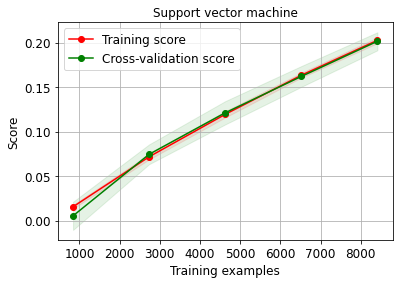

None


In [475]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
print(r2_score(y_test,pred_svr)*100)
print(mean_absolute_error(y_test,pred_svr))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(svr,X,y,cv=5,scoring='r2',text_fontsize='large',title='Support vector machine')
print(plt.show())

### hypertuning the model Gridsearchcv

In [476]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [477]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rlf=RandomForestRegressor()
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=0)
params = {'n_estimators':[100,150],
        'min_samples_split':[2,6],
        'min_samples_leaf':[1,5],
        'max_features': range(1,4)
        }
grd = GridSearchCV(rlf,param_grid = params)
grd.fit(x_train,y_train)
print('best_pram', grd.best_params_)

rf=grd.best_estimator_ #reinstantiating with best params

rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))

best_pram {'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 100}
68.42683457848713
1639.2033032964207
RMSE : 2307.696549208333


68.90108343219038
1591.1785111598695
RMSE : 2290.299444491506


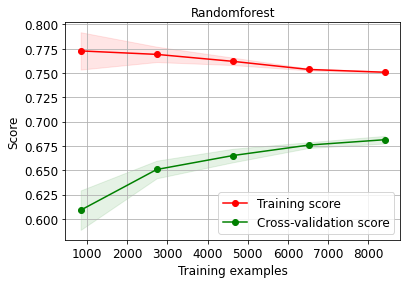

None


In [478]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_features=4, min_samples_leaf=2, min_samples_split=2,n_estimators=120)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(rf,X,y,cv=5,scoring='r2',text_fontsize='large',title='Randomforest')
print(plt.show())

In [479]:
test_data = pd.read_excel('Test_set.xlsx')
test_data.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

In [480]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

## Feature engineering of test_data

In [481]:
test_data.drop(columns=['Date_of_Journey','Route','Dep_Time', 'Arrival_Time','Additional_Info'],axis=1,inplace=True)

In [482]:
destination = []
for i in test_data["Destination"]:
    if i == 'New Delhi':
        destination.append("Delhi")
    else:
        destination.append(i)

In [483]:
test_data['Destination'] = destination

In [484]:
test_data['Airline'] = lab_enc.fit_transform(test_data['Airline'])
test_data['Source'] = lab_enc.fit_transform(test_data['Source'])
test_data['Destination'] = lab_enc.fit_transform(test_data['Destination'])
test_data['Total_Stops'] = lab_enc.fit_transform(test_data['Total_Stops'])

In [485]:
test_data['Duration']=  test_data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [486]:
test_data

Airline  Source  Destination  Duration  Total_Stops
0           4       2            1       655            0
1           3       3            0       240            0
2           4       2            1      1425            0
3           6       2            1       780            0
4           0       0            2       170            4
...       ...     ...          ...       ...          ...
2666        1       3            0      1435            0
2667        3       3            0       155            4
2668        4       2            1       395            0
2669        1       2            1       915            0
2670        6       2            1       860            0

[2671 rows x 5 columns]

### Test_Data Normalization

features = ['Duration']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
test_data[features]  = pt.fit_transform(test_data[features].values)
test_data.head()

In [487]:
X = test_data

In [488]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns) 

In [489]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns

# lets check the vif
vif

vif     Features
0  3.155782      Airline
1  3.072811       Source
2  3.074224  Destination
3  2.523597     Duration
4  2.539587  Total_Stops

In [490]:
pred = rf.predict(X)

In [491]:
pred

array([12908.61722157,  4267.04784092, 12605.76660396, ...,
       13413.29933494,  7344.73476701, 11594.02849631])

In [495]:
submission_file=pd.read_excel("Sample_submission.xlsx")
submission_file.head()

Price
0  15998
1  16612
2  25572
3  25778
4  16934

In [496]:
series = pd.Series(pred)

In [497]:
submission_file['Price_predicted'] = series

In [498]:
submission_file.to_csv('submission_final.csv',columns=['Price_predicted'],index=False)